In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import gym
from main.maml_agent import MAMLAgent, register_flags
register_flags()
from main.alpaca import *
from main.dataset import *
from main.dataViz import *
import yaml

WARN: Cannot define MaxPoolGrad, likely already defined for this version of tensorflow: "Registering two gradient with name 'MaxPoolGrad'! (Previous registration was in register /home/somrita/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/registry.py:66)"


In [2]:
cfg_filename = 'configs/sinusoid-config.yml'
with open(cfg_filename,'r') as ymlfile:
    config = yaml.load(ymlfile)

/home/somrita/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
dataset = SinusoidDataset(config)

## Default agent

In [4]:
g1 = tf.Graph()
sess1 = tf.InteractiveSession(config=tf.ConfigProto(log_device_placement=True), graph=g1)
agent = ALPaCA(config, sess1, g1)

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device



In [5]:
agent.construct_model()






Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.












In [6]:
agent.train(dataset,3000)

loss: 67.27012
loss: 13.146906
loss: 8.017818
loss: 50.687843
loss: 0.9891425
loss: 2.0719495
loss: 0.048092518
loss: -0.11172643
loss: 0.3703869
loss: 0.9811178
loss: 0.6403307
loss: 1.8588781
loss: -0.42908537
loss: 0.13046956
loss: 0.58424664
loss: -0.025452418
loss: -0.2990076
loss: -0.64137805
loss: -0.1767999
loss: -0.70138055
loss: -1.6777091
loss: -0.8439072
loss: 0.2932967
loss: -0.6334758
loss: -1.0038509
loss: -0.96960664
loss: -0.9163327
loss: 0.656575
loss: -0.4853012
loss: 0.19683792
loss: -0.66664094
loss: -1.0884392
loss: -0.77171236
loss: -0.17078453
loss: -1.6387799
loss: -0.795875
loss: -1.5499569
loss: -0.5523851
loss: -0.3996068
loss: -1.2982327
loss: -0.48488945
loss: -1.0334009
loss: -0.17447613
loss: -0.42111638
loss: -0.9445833
loss: -0.21645671
loss: 0.1165322
loss: -0.9524228
loss: -1.6895154
loss: -1.8063644
loss: -1.0613551
loss: -0.7683937
loss: -0.78681207
loss: -0.32849962
loss: -1.5402766
loss: -1.6067368
loss: -1.5791725
loss: 0.039467305
loss: -0.7609

## Agent without meta-training

In [7]:
g2 = tf.Graph()
sess2 = tf.Session(config=tf.ConfigProto(log_device_placement=True), graph=g2)
agent_nometa = ALPaCA(config,sess2,g2)
agent_nometa.config['data_horizon'] = 0
agent_nometa.construct_model()
agent_nometa.train(dataset, 3000)

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device

loss: 5.907016
loss: 2.4182413
loss: 2.2973902
loss: 2.6998959
loss: 2.5191183
loss: 2.3452451
loss: 1.919353
loss: 2.038345
loss: 2.3474107
loss: 2.3707263
loss: 1.6675313
loss: 2.1796055
loss: 2.7755244
loss: 1.7220356
loss: 1.9046267
loss: 2.3849812
loss: 2.0881248
loss: 1.7842804
loss: 2.2903147
loss: 1.969603
loss: 1.5964581
loss: 2.5143719
loss: 2.054321
loss: 2.1720943
loss: 2.1619081
loss: 2.235452
loss: 2.2751462
loss: 1.9809046
loss: 1.932734
loss: 2.162467
loss: 1.8163861
loss: 2.1634302
loss: 2.4201164
loss: 2.2139492
loss: 2.0987759
loss: 2.1129158
loss: 1.7064295
loss: 1.8241959
loss: 2.0275784
loss: 1.9039775
loss: 1.6897534
loss: 1.7914411
loss: 2.1810567
loss: 1.6909921
loss: 2.6575928
loss: 2.1457708
loss: 1.8790195
loss: 1.8843237
loss: 1.9825412
loss: 1.9203664
loss: 1.7588217
loss: 1.7635407
loss: 2.0137336
loss: 2.3039021
loss: 1.934397
loss: 2.2887933
loss: 2.1310217
loss:

## GP regression agent

In [8]:
from main.gp_reg import *

GPR_agent = GPReg()

## MAML Agent

In [9]:
g3 = tf.Graph()
sess3 = tf.Session(config=tf.ConfigProto(log_device_placement=True), graph=g3)
maml_agent = MAMLAgent(config, sess3, g3, exp_string="sinusoid_test5")

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device



In [10]:
maml_agent.construct_model()

using sinusoid arch

Instructions for updating:
Use `tf.cast` instead.
INFO:tensorflow:Summary name metatrain_Pre-update loss is illegal; using metatrain_Pre-update_loss instead.
INFO:tensorflow:Summary name metatrain_Post-update loss, step 1 is illegal; using metatrain_Post-update_loss__step_1 instead.
INFO:tensorflow:Summary name metatrain_Post-update loss, step 2 is illegal; using metatrain_Post-update_loss__step_2 instead.
INFO:tensorflow:Summary name metatrain_Post-update loss, step 3 is illegal; using metatrain_Post-update_loss__step_3 instead.
INFO:tensorflow:Summary name metatrain_Post-update loss, step 4 is illegal; using metatrain_Post-update_loss__step_4 instead.
INFO:tensorflow:Summary name metatrain_Post-update loss, step 5 is illegal; using metatrain_Post-update_loss__step_5 instead.


Restoring model weights from summaries/sinusoid_test5/model19999
INFO:tensorflow:Restoring parameters from summaries/sinusoid_test5/model19999


In [11]:
maml_agent.train(dataset, 10000)

Done initializing, starting training.


# Visualize all agents

In [12]:
N_test = 500
test_horz = 30
X_test, Y_test, freq_list_test, amp_list_test, phase_list_test = dataset.sample(N_test,test_horz, return_lists=True)

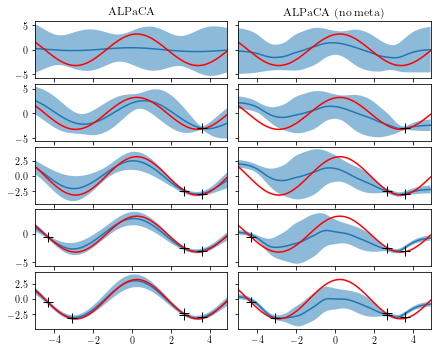

In [13]:
ind = 10
sample_size_list = [0,1,2,3,5]
plt.figure(figsize=(9,len(sample_size_list)*1))
for i,num_pts in enumerate(sample_size_list):
    X_update = X_test[ind:(ind+1),:num_pts,:]
    Y_update = Y_test[ind:(ind+1),:num_pts,:]
    
    title=None
    legend=False
    if i == 0:
        legend=True
        title=True
        
    ax1 = plt.subplot(len(sample_size_list),3,3*i+1)
    gen_sin_fig(agent, X_update, Y_update, freq_list_test[ind], phase_list_test[ind], amp_list_test[ind], label=None)
    if i == 0:
        plt.title('ALPaCA')
    if i < len(sample_size_list) - 1:
        plt.setp(ax1.get_xticklabels(), visible=False)
    
    ax2 = plt.subplot(len(sample_size_list),3,3*i+2, sharey=ax1)
    gen_sin_fig(agent_nometa, X_update, Y_update, freq_list_test[ind], phase_list_test[ind], amp_list_test[ind], label=None)
    plt.setp(ax2.get_yticklabels(), visible=False)
    if i == 0:
        plt.title('ALPaCA (no meta)')
    if i < len(sample_size_list) - 1:
        plt.setp(ax2.get_xticklabels(), visible=False)
    
#     ax3 = plt.subplot(len(sample_size_list),3,3*i+3, sharey=ax1)
#     gen_sin_fig(GPR_agent, X_update, Y_update, freq_list_test[ind], phase_list_test[ind], amp_list_test[ind], label=None)
#     plt.setp(ax3.get_yticklabels(), visible=False)
#     if i == 0:
#         plt.title('GPR')
#     if i < len(sample_size_list) - 1:
#         plt.setp(ax3.get_xticklabels(), visible=False)

plt.tight_layout(w_pad=0.0,h_pad=0.2)
plt.savefig('figures/sinusoid_three.pdf')
plt.show()

In [14]:
#compute MSE and time
import time
import tqdm

def gaussian_nll(y,mu,Sig):
    n = 1
    logdet = np.log(Sig) 
    nll = n*np.log(2*np.pi) + logdet + ((y-mu).T * (1/Sig) * (y-mu))
    return 0.5*nll

def MSE(y,mu):
    return (y-mu)**2

def get_stats(meas, N):
    mean = sum(meas)/N
    var = sum([(nl - mean)**2 for nl in meas])/(N-1)
    return mean, var

alpaca_nll_mean = []
alpaca_nll_var = []
alpaca_time_mean = []
alpaca_time_var = []
alpaca_mse_mean = []
alpaca_mse_var = []

maml_time_mean = []
maml_time_var = []
maml_mse_mean = []
maml_mse_var = []
maml5_mse_mean = []
maml5_mse_var = []

lpaca_nll_mean = []
lpaca_nll_var = []
lpaca_time_mean = []
lpaca_time_var = []

gp_nll_mean = []
gp_nll_var = []
gp_time_mean = []
gp_time_var = []

for j in tqdm.tqdm(range(test_horz)):
    nll_list_alpaca = []
    nll_list_lpaca = []
    nll_list_gp = []
    
    mse_list_alpaca = []
    mse_list_maml = []
    mse_list_maml5 = []

    time_list_alpaca = []
    time_list_maml = []
    time_list_lpaca = []
    time_list_gp = []
    
    for ind in range(N_test):
        X_update = X_test[ind:(ind+1),:j,:]
        Y_update = Y_test[ind:(ind+1),:j,:]
        x_pt = X_test[ind:(ind+1),(j):(j+1),:]
        y_pt = Y_test[ind:(ind+1),(j):(j+1),:]
    
        t1_alpaca = time.process_time()
        y, s = agent.test(X_update, Y_update, x_pt)
        t2_alpaca = time.process_time()
        
        t1_maml = time.process_time()
        y_maml, _ = maml_agent.test(X_update, Y_update, x_pt)
        t2_maml = time.process_time()
        y_maml5, _ = maml_agent.test(X_update, Y_update, x_pt, num_updates=5)
        
        t1_lpaca = time.process_time()
        y_lpaca,s_lpaca = agent_nometa.test(X_update, Y_update, x_pt)
        t2_lpaca = time.process_time()
        
        t1_gp = time.process_time()
        y_gp, s_gp = GPR_agent.test(X_update, Y_update, x_pt)
        t2_gp = time.process_time()    
            
        nll_list_alpaca.append(gaussian_nll(y_pt[0,0,0],y[0,0,0],s[0,0,0,0]))
        nll_list_lpaca.append(gaussian_nll(y_pt[0,0,0],y_lpaca[0,0,0],s_lpaca[0,0,0,0]))
        nll_list_gp.append(gaussian_nll(y_pt[0,0,0],y_gp[0,0,0],s_gp[0,0,0,0]))
        
        time_list_alpaca.append(t2_alpaca - t1_alpaca)
        time_list_lpaca.append(t2_lpaca - t1_lpaca)
        time_list_maml.append(t2_maml - t1_maml)
        time_list_gp.append(t2_gp - t1_gp)
        
        mse_list_alpaca.append(MSE(y_pt[0,0,0],y[0,0,0]))
        mse_list_maml.append(MSE(y_pt[0,0,0], y_maml[0,0,0]))
        mse_list_maml5.append(MSE(y_pt[0,0,0], y_maml5[0,0,0]))
        
    time_mean_alpaca, time_var_alpaca = get_stats(time_list_alpaca,N_test)
    time_mean_lpaca, time_var_lpaca = get_stats(time_list_lpaca,N_test)
    time_mean_maml, time_var_maml = get_stats(time_list_maml,N_test)
    time_mean_gp, time_var_gp = get_stats(time_list_gp,N_test)
    
    mse_mean_alpaca, mse_var_alpaca = get_stats(mse_list_alpaca,N_test)
    mse_mean_maml, mse_var_maml = get_stats(mse_list_maml,N_test)
    mse_mean_maml5, mse_var_maml5 = get_stats(mse_list_maml5,N_test)
    
    nll_mean_alpaca, nll_var_alpaca = get_stats(nll_list_alpaca,N_test)
    nll_mean_lpaca, nll_var_lpaca = get_stats(nll_list_lpaca,N_test)
    nll_mean_gp, nll_var_gp = get_stats(nll_list_gp,N_test)
    
    alpaca_time_mean.append(time_mean_alpaca)
    alpaca_time_var.append(time_var_alpaca)
    
    lpaca_time_mean.append(time_mean_lpaca)
    lpaca_time_var.append(time_var_lpaca)
    
    maml_time_mean.append(time_mean_maml)
    maml_time_var.append(time_var_maml)
    
    gp_time_mean.append(time_mean_gp)
    gp_time_var.append(time_var_gp)
    
    alpaca_mse_mean.append(mse_mean_alpaca)
    alpaca_mse_var.append(mse_var_alpaca)
    
    maml_mse_mean.append(mse_mean_maml)
    maml_mse_var.append(mse_var_maml)
    
    maml5_mse_mean.append(mse_mean_maml5)
    maml5_mse_var.append(mse_var_maml5)
    
    alpaca_nll_mean.append(nll_mean_alpaca)
    alpaca_nll_var.append(nll_var_alpaca)
    
    lpaca_nll_mean.append(nll_mean_lpaca)
    lpaca_nll_var.append(nll_var_lpaca)
    
    gp_nll_mean.append(nll_mean_gp)
    gp_nll_var.append(nll_var_gp)

  3%|▎         | 1/30 [00:01<00:55,  1.93s/it]/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_pro

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
 17%|█▋        | 5/30 [00:21<01:46,  4.28s/it]/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_pro

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

 23%|██▎       | 7/30 [00:32<01:48,  4.74s/it]/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_pro

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
 40%|████      | 12/30 [01:00<01:38,  5.48s/it]/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_pr

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
 43%|████▎     | 13/30 [01:06<01:33,  5.48s/it]/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_pr

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

 60%|██████    | 18/30 [01:34<01:07,  5.58s/it]/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_pr

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

 80%|████████  | 24/30 [02:08<00:34,  5.71s/it]/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_pr

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
 87%|████████▋ | 26/30 [02:19<00:22,  5.69s/it]/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_pr

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0., 0., 0.]), 'task': b'ERROR: NO FEASIBLE SOLUTION', 'funcalls': 0, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)
/home/somrita/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bf

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


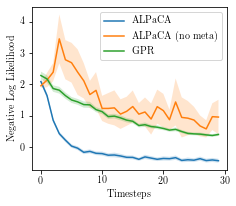

In [15]:
plt.figure(figsize=(3.5,3))
nll_plot(alpaca_nll_mean,alpaca_nll_var,lpaca_nll_mean,lpaca_nll_var,gp_nll_mean,gp_nll_var,N_test,legend=True)
plt.savefig('figures/nll_sinusoid.pdf')
plt.show()

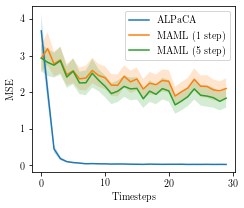

In [16]:
plt.figure(figsize=(3.5,3))
mse_plot(alpaca_mse_mean,alpaca_mse_var,maml_mse_mean,maml_mse_var,maml5_mse_mean,maml5_mse_var,N_test,legend=True)
plt.tight_layout()
plt.savefig('figures/mse_sinusoid.pdf')
plt.show()

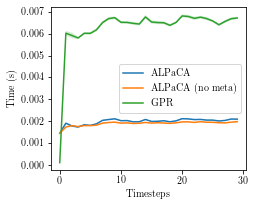

In [17]:
plt.figure(figsize=(3.5,3))
time_plot(alpaca_time_mean,alpaca_time_var,lpaca_time_mean,lpaca_time_var,gp_time_mean,gp_time_var,N_test,legend=True)
plt.savefig('figures/time_sinusoid.pdf')
plt.show()